In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('Trading-features.csv')# lodading data file

# Cleaning Data

In [6]:
df.fillna(0,inplace=True) # it replaces all NaN values by 0

In [7]:
df1=df.drop('id',axis=1) # it removes id column which is not helpful for our data

In [8]:
# df1=df1.drop('last_price',axis=1)# it removes last_price column because we will have target column which is same as last_price column

In [9]:
df1=df1.drop('created_at',axis=1)# it removes created_at column because it is date time which is not helpful in prediction

# Creating New target Column for last_price column

In [10]:
df1['target']=pd.Series([0 if current<previous else 1 if current>previous else 2 for current,previous in zip(df1['last_price'],df1['last_price'].shift())])

# Extracting time

In [11]:
df['created_at']=pd.to_datetime(df['created_at']) # Converting column to date time

In [12]:
df['time']=df['created_at'].dt.time # converting date time to time

In [13]:
df1['hours']=df['time'].apply(lambda x: x.hour) # extracting hours in a separate column

In [14]:
df1['minutes']=df['time'].apply(lambda x: x.minute)# extracting minutes in a separate column

In [15]:
df1['seconds']=df['time'].apply(lambda x: x.second)# extracting seconds in a separate column

In [16]:
df1

,last_price,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f156,f157,f158,f159,f160,f161,target,hours,minutes,seconds
0,43138.2,0.000463,15139,-43.1,43.0,-0.1,-4.8,-5.1,-4.3,-15.2,...,-123.8,695.2,695.2,-123.8,-123.8,695.2,2,12,47,41
1,43138.2,0.000463,15140,-43.1,43.0,-0.1,-4.7,-5.1,-2.4,-15.2,...,-123.8,695.2,695.2,-123.8,-123.8,695.2,2,12,47,40
2,43138.2,0.000463,15141,-37.4,43.0,5.6,-1.9,-0.6,-2.4,-6.7,...,-123.8,695.2,695.2,-123.8,-123.8,695.2,2,12,47,39
3,43138.2,0.000463,15142,-37.4,37.4,0.0,-3.7,-6.2,-10.2,-12.3,...,-123.8,695.2,695.2,-123.8,-123.8,695.2,2,12,47,38
4,43132.6,0.000463,15143,-39.6,36.5,-3.1,-3.7,-9.4,-10.2,-12.4,...,-129.4,689.6,689.6,-129.4,-129.4,689.6,0,12,47,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,42753.6,0.000414,25191,-29.5,29.4,-0.1,3.5,9.6,9.7,-23.7,...,-41.3,440.2,440.2,-41.3,-41.3,440.2,0,10,0,9
9996,42753.6,0.000414,25192,-29.5,29.4,-0.1,3.4,9.6,9.7,-21.5,...,-41.3,440.2,440.2,-41.3,-41.3,440.2,2,10,0,8
9997,42753.6,0.000414,25193,-36.7,36.6,-0.1,3.7,9.7,12.6,-21.4,...,-41.3,440.2,440.2,-41.3,-41.3,440.2,2,10,0,7
9998,42753.7,0.000414,25194,-36.7,48.5,11.8,22.6,21.6,23.7,-9.6,...,-41.2,440.3,440.3,-41.2,-41.2,440.3,1,10,0,6


# Training the Model

In [17]:
X=np.asarray(df1)# independent variables or features

In [18]:
y=np.asarray(df1['target']) #dependent variable

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)# spliting the data into 20% and 80 %

# Using SVM Model

In [21]:
from sklearn import svm

In [22]:
clf=svm.SVC()

In [23]:
clf.fit(X_train,y_train)

SVC()

In [24]:
y_pred=clf.predict(X_test)

# Checking Accuracy of Model

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.36      0.07      0.11       620
           1       0.39      0.16      0.23       654
           2       0.40      0.88      0.55       726

    accuracy                           0.39      2000
   macro avg       0.38      0.37      0.30      2000
weighted avg       0.38      0.39      0.31      2000



# Visualization of 10 features with the target using Boxplot

In [27]:
import seaborn as sns

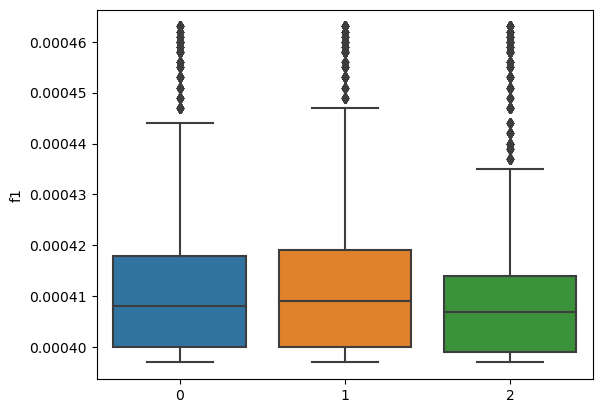

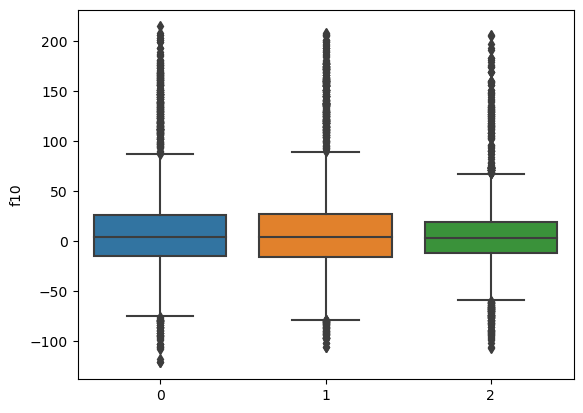

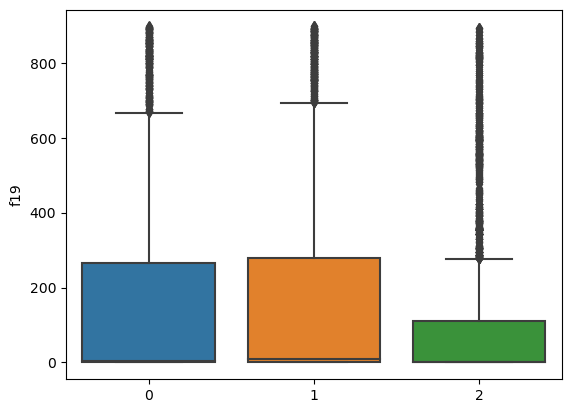

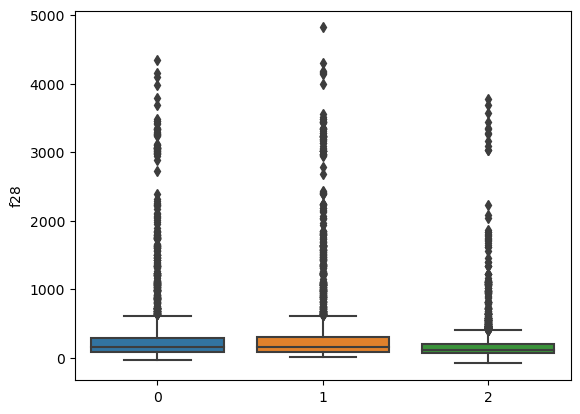

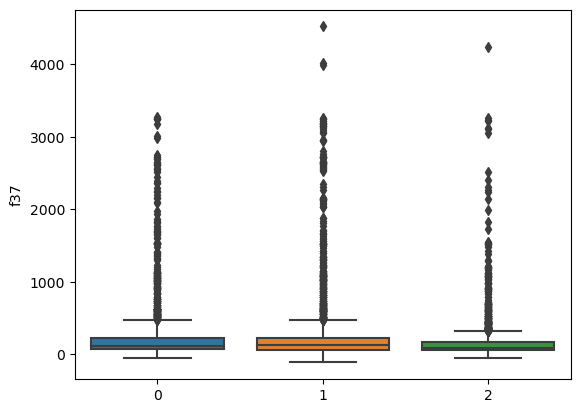

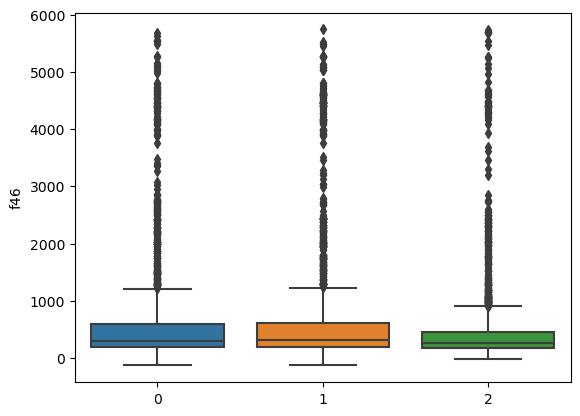

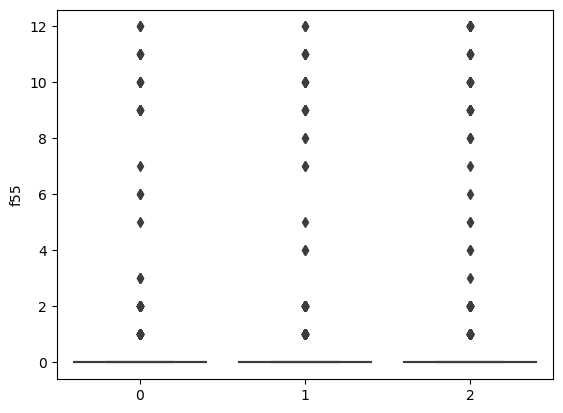

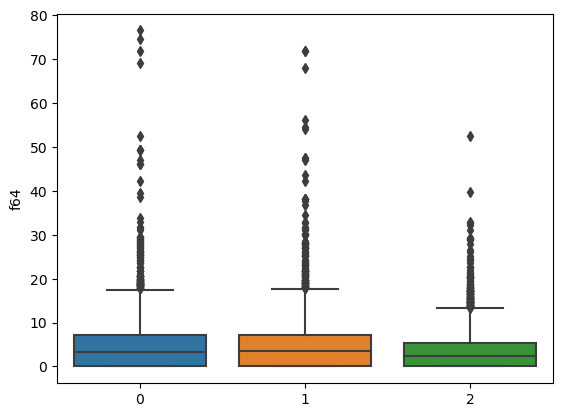

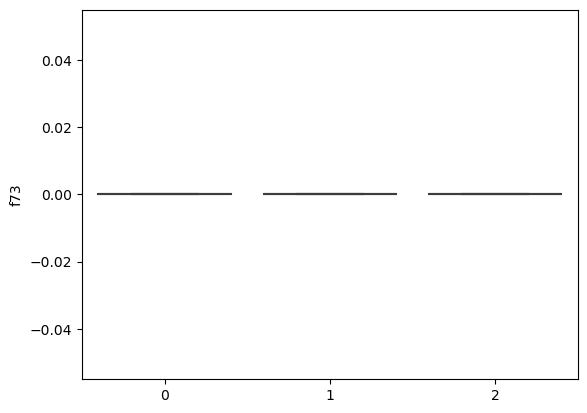

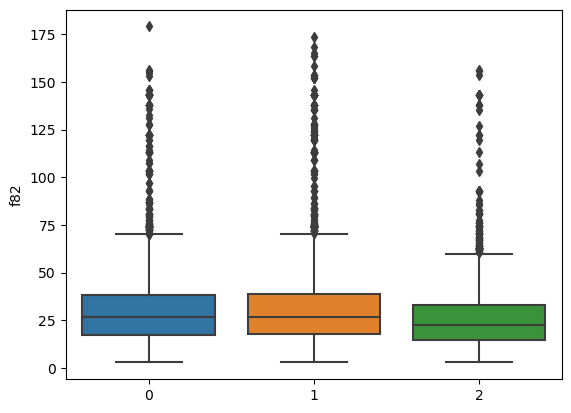

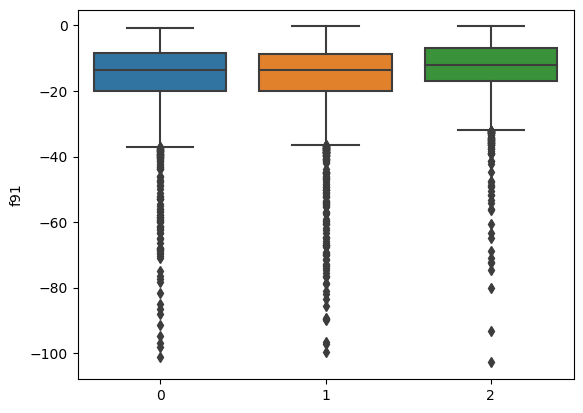

In [31]:
for i in range(1,100,9):
    sns.boxplot(x=y,y=X[:,i])
    plt.ylabel(f'f{i}')
    plt.show()

# Visualization of 5 features with the target using Histogram

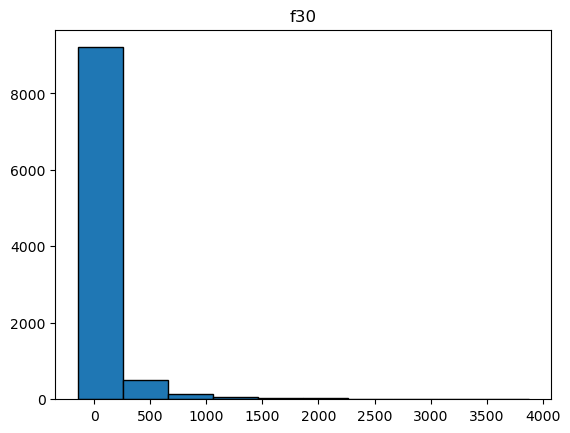

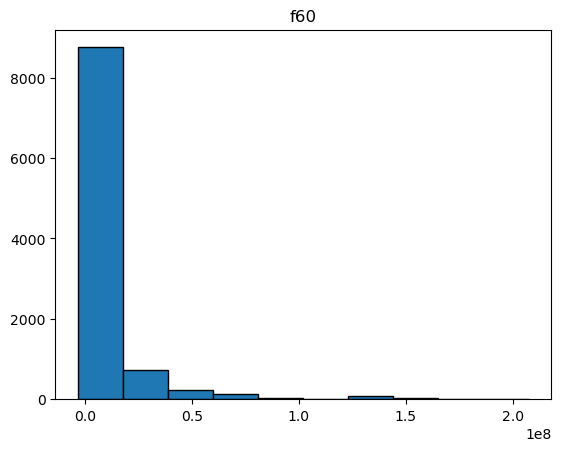

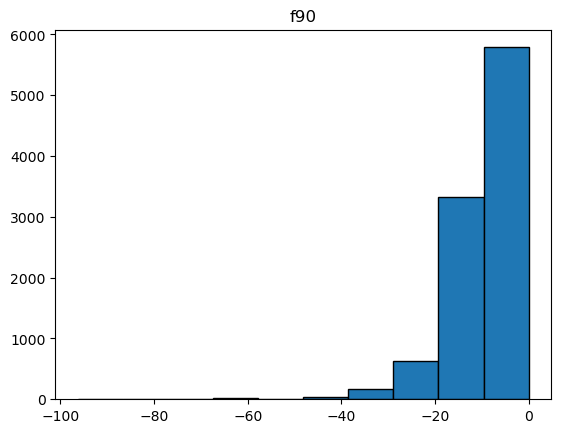

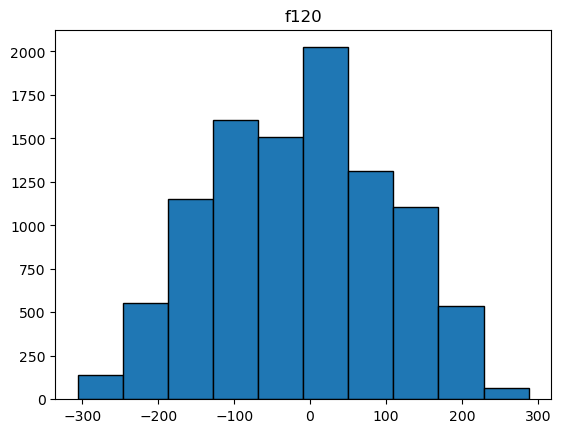

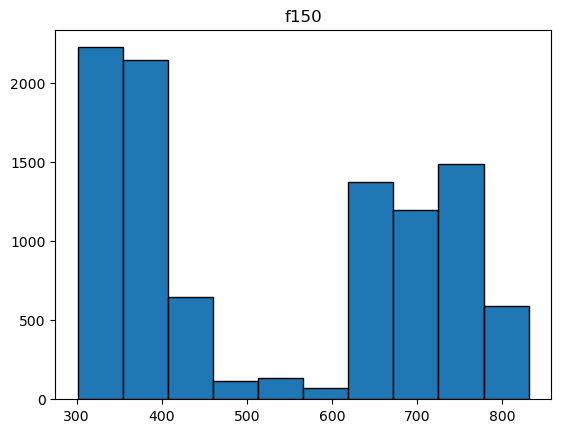

In [34]:
for i in range(30,151,30):
    plt.hist(X[:,i],edgecolor='black')
    plt.title(f'f{i}')
    plt.show()

# Training Model

In [35]:
from sklearn.svm import SVC

In [ ]:
kernel=['linear','rbf','poly']
for i in kernel:
    model=SVC(kernel=i,C=1.0)
    model.fit(X_train,y_train)
    print('For kernel : ',i)
    print('Accuracy is : ',model.score(X_test,y_test))